In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

plt.rcParams['figure.figsize'] = [12, 8]

In [12]:
# read all csvs from timemore
csvs = glob.glob('./data/*_data_stats.csv')
csvs = sorted(csvs, key=lambda x: int(re.match(r'(\d+)', x.split('/')[2]).groups()[0]))
csvs

['./data/6_data_stats.csv',
 './data/8_data_stats.csv',
 './data/10_data_stats.csv',
 './data/12_data_stats.csv',
 './data/14_data_stats.csv',
 './data/16_data_stats.csv']

In [13]:
dfs = [pd.read_csv(x) for x in csvs]
dfs

[   Unnamed: 0  AVG_DIAM  STD_DIAM  AVG_SURF  STD_SURF   EFF  QUAL
 0           0      0.39      0.14      0.14       0.1  97.4  1.41,
    Unnamed: 0  AVG_DIAM  STD_DIAM  AVG_SURF  STD_SURF   EFF  QUAL
 0           0      0.45      0.18      0.18      0.14  96.7  1.29,
    Unnamed: 0  AVG_DIAM  STD_DIAM  AVG_SURF  STD_SURF   EFF  QUAL
 0           0      0.49      0.19      0.22      0.17  95.7  1.32,
    Unnamed: 0  AVG_DIAM  STD_DIAM  AVG_SURF  STD_SURF   EFF  QUAL
 0           0      0.55      0.21      0.27      0.19  95.3  1.43,
    Unnamed: 0  AVG_DIAM  STD_DIAM  AVG_SURF  STD_SURF   EFF  QUAL
 0           0      0.59      0.28      0.33       0.3  95.1   1.1,
    Unnamed: 0  AVG_DIAM  STD_DIAM  AVG_SURF  STD_SURF   EFF  QUAL
 0           0      0.62      0.29      0.36      0.32  94.9  1.14]

In [14]:
df = pd.concat(dfs)
df = df.drop(['Unnamed: 0'], axis=1)
df['GRIND'] = [6, 8, 10, 12, 14, 16]
df['CV_DIAM'] = df.apply(lambda row: row['STD_DIAM'] / row['AVG_DIAM'], axis=1)
df['CV_SURF'] = df.apply(lambda row: row['STD_SURF'] / row['AVG_SURF'], axis=1)
df

,AVG_DIAM,STD_DIAM,AVG_SURF,STD_SURF,EFF,QUAL,GRIND,CV_DIAM,CV_SURF
0,0.39,0.14,0.14,0.10,97.4,1.41,6,0.358974,0.714286
0,0.45,0.18,0.18,0.14,96.7,1.29,8,0.400000,0.777778
0,0.49,0.19,0.22,0.17,95.7,1.32,10,0.387755,0.772727
0,0.55,0.21,0.27,0.19,95.3,1.43,12,0.381818,0.703704
0,0.59,0.28,0.33,0.30,95.1,1.10,14,0.474576,0.909091
0,0.62,0.29,0.36,0.32,94.9,1.14,16,0.467742,0.888889


<AxesSubplot:title={'center':'Timemore V60'}, xlabel='GRIND', ylabel='Surface (mm²)'>

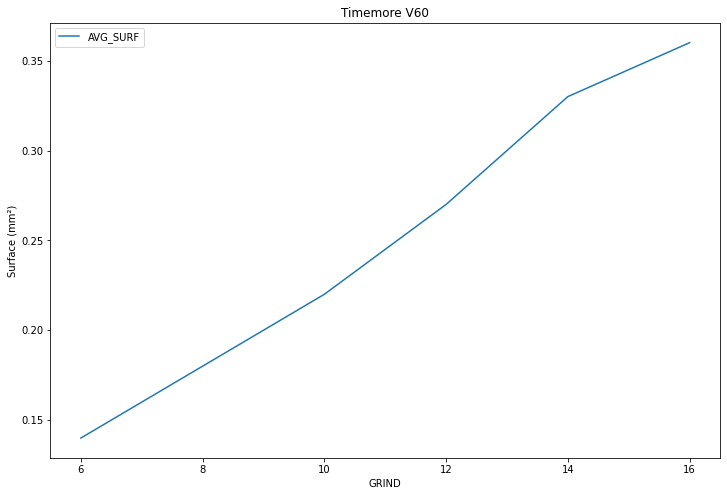

In [15]:
df.plot(x='GRIND', y=['AVG_SURF'], title='Timemore V60', ylabel='Surface (mm²)')

<AxesSubplot:title={'center':'Timemore V60'}, xlabel='GRIND', ylabel='Coefficient of variation'>

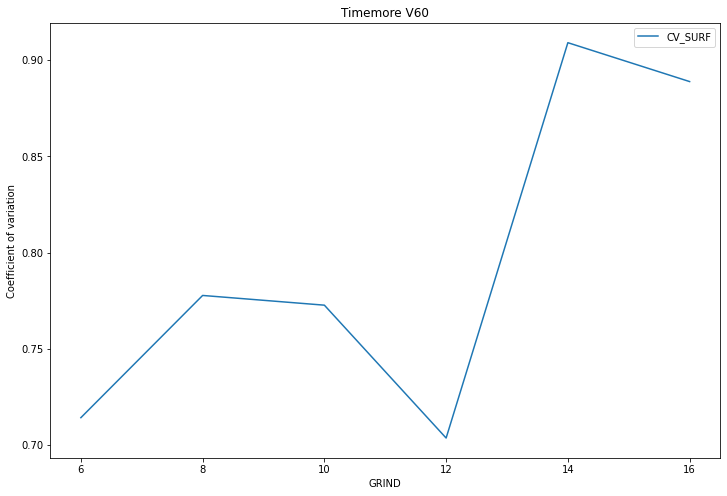

In [16]:
df.plot(x='GRIND', y=['CV_SURF'], title='Timemore V60', ylabel='Coefficient of variation')